In [33]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

# Importing all Datasets

In [34]:
customer_data =  pd.read_excel(r"C:\Users\Pranav\Downloads\14. Capstone Case Study - Finding-Marketing-Insights\Datasets\CustomersData.xlsx")

In [35]:
customer_data

CustomerID Gender    Location  Tenure_Months
0          17850      M     Chicago             12
1          13047      M  California             43
2          12583      M     Chicago             33
3          13748      F  California             30
4          15100      M  California             49
...          ...    ...         ...            ...
1463       14438      F    New York             41
1464       12956      F     Chicago             48
1465       15781      M  New Jersey             19
1466       14410      F    New York             45
1467       14600      F  California              7

[1468 rows x 4 columns]

In [36]:
customer_data.isna().sum()

CustomerID       0
Gender           0
Location         0
Tenure_Months    0
dtype: int64

In [37]:
online_sales = pd.read_csv(r"C:\Users\Pranav\Downloads\14. Capstone Case Study - Finding-Marketing-Insights\Datasets\Online_Sales.csv")

In [38]:
online_sales

CustomerID  Transaction_ID  Transaction_Date     Product_SKU  \
0           17850           16679          20190101  GGOENEBJ079499   
1           17850           16680          20190101  GGOENEBJ079499   
2           17850           16681          20190101  GGOEGFKQ020399   
3           17850           16682          20190101  GGOEGAAB010516   
4           17850           16682          20190101  GGOEGBJL013999   
...           ...             ...               ...             ...   
52919       14410           48493          20191231  GGOENEBB078899   
52920       14410           48494          20191231  GGOEGAEB091117   
52921       14410           48495          20191231  GGOENEBQ084699   
52922       14600           48496          20191231  GGOENEBQ079199   
52923       14600           48497          20191231  GGOENEBQ079099   

                                     Product_Description Product_Category  \
0      Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1      Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2                  Google Laptop and Cell Phone Stickers           Office   
3      Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                        Google Canvas Tote Natural/Navy             Bags   
...                                                  ...              ...   
52919              Nest Cam Indoor Security Camera - USA         Nest-USA   
52920                            Google Zip Hoodie Black          Apparel   
52921       Nest Learning Thermostat 3rd Gen-USA - White         Nest-USA   
52922      Nest Protect Smoke + CO White Wired Alarm-USA         Nest-USA   
52923    Nest Protect Smoke + CO White Battery Alarm-USA         Nest-USA   

       Quantity  Avg_Price  Delivery_Charges Coupon_Status  
0             1     153.71              6.50          Used  
1             1     153.71              6.50          Used  
2             1       2.05              6.50          Used  
3             5      17.53              6.50      Not Used  
4             1      16.50              6.50          Used  
...         ...        ...               ...           ...  
52919         1     121.30              6.50       Clicked  
52920         1      48.92              6.50          Used  
52921         1     151.88              6.50          Used  
52922         5      80.52              6.50       Clicked  
52923         4      80.52             19.99       Clicked  

[52924 rows x 10 columns]

In [39]:
#Converting the Transaction_Date column into datetime format 
online_sales['Transaction_Date'] = pd.to_datetime(online_sales['Transaction_Date'],format='%Y%m%d')

In [40]:
online_sales['Transaction_Date']

0       2019-01-01
1       2019-01-01
2       2019-01-01
3       2019-01-01
4       2019-01-01
           ...    
52919   2019-12-31
52920   2019-12-31
52921   2019-12-31
52922   2019-12-31
52923   2019-12-31
Name: Transaction_Date, Length: 52924, dtype: datetime64[ns]

In [41]:
discount_coupon = pd.read_csv(r"C:\Users\Pranav\Downloads\14. Capstone Case Study - Finding-Marketing-Insights\Datasets\Discount_Coupon.csv")

In [42]:
discount_coupon.isna().sum()

Month                0
Product_Category     0
Coupon_Code          0
Discount_pct         0
dtype: int64

In [43]:
marketing_spend = pd.read_csv(r"C:\Users\Pranav\Downloads\14. Capstone Case Study - Finding-Marketing-Insights\Datasets\Marketing_Spend.csv")

In [44]:
marketing_spend.isna().sum()

Date             0
Offline_Spend    0
Online_Spend     0
dtype: int64

In [45]:
tax_amount = pd.read_excel(r"C:\Users\Pranav\Downloads\14. Capstone Case Study - Finding-Marketing-Insights\Datasets\Tax_amount.xlsx")

In [46]:
tax_amount.isna().sum()

Product_Category    0
GST                 0
dtype: int64

In [47]:
#merging both the tables 'online_sales' and 'customer_data' on CustomerID
df = pd.merge(online_sales,customer_data,left_on='CustomerID',right_on='CustomerID',how='inner')

In [48]:
df

CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0           17850           16679       2019-01-01  GGOENEBJ079499   
1           17850           16680       2019-01-01  GGOENEBJ079499   
2           17850           16681       2019-01-01  GGOEGFKQ020399   
3           17850           16682       2019-01-01  GGOEGAAB010516   
4           17850           16682       2019-01-01  GGOEGBJL013999   
...           ...             ...              ...             ...   
52919       14410           48493       2019-12-31  GGOENEBB078899   
52920       14410           48494       2019-12-31  GGOEGAEB091117   
52921       14410           48495       2019-12-31  GGOENEBQ084699   
52922       14600           48496       2019-12-31  GGOENEBQ079199   
52923       14600           48497       2019-12-31  GGOENEBQ079099   

                                     Product_Description Product_Category  \
0      Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1      Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2                  Google Laptop and Cell Phone Stickers           Office   
3      Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                        Google Canvas Tote Natural/Navy             Bags   
...                                                  ...              ...   
52919              Nest Cam Indoor Security Camera - USA         Nest-USA   
52920                            Google Zip Hoodie Black          Apparel   
52921       Nest Learning Thermostat 3rd Gen-USA - White         Nest-USA   
52922      Nest Protect Smoke + CO White Wired Alarm-USA         Nest-USA   
52923    Nest Protect Smoke + CO White Battery Alarm-USA         Nest-USA   

       Quantity  Avg_Price  Delivery_Charges Coupon_Status Gender    Location  \
0             1     153.71              6.50          Used      M     Chicago   
1             1     153.71              6.50          Used      M     Chicago   
2             1       2.05              6.50          Used      M     Chicago   
3             5      17.53              6.50      Not Used      M     Chicago   
4             1      16.50              6.50          Used      M     Chicago   
...         ...        ...               ...           ...    ...         ...   
52919         1     121.30              6.50       Clicked      F    New York   
52920         1      48.92              6.50          Used      F    New York   
52921         1     151.88              6.50          Used      F    New York   
52922         5      80.52              6.50       Clicked      F  California   
52923         4      80.52             19.99       Clicked      F  California   

       Tenure_Months  
0                 12  
1                 12  
2                 12  
3                 12  
4                 12  
...              ...  
52919             45  
52920             45  
52921             45  
52922              7  
52923              7  

[52924 rows x 13 columns]

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52924 entries, 0 to 52923
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  int64         
 1   Transaction_ID       52924 non-null  int64         
 2   Transaction_Date     52924 non-null  datetime64[ns]
 3   Product_SKU          52924 non-null  object        
 4   Product_Description  52924 non-null  object        
 5   Product_Category     52924 non-null  object        
 6   Quantity             52924 non-null  int64         
 7   Avg_Price            52924 non-null  float64       
 8   Delivery_Charges     52924 non-null  float64       
 9   Coupon_Status        52924 non-null  object        
 10  Gender               52924 non-null  object        
 11  Location             52924 non-null  object        
 12  Tenure_Months        52924 non-null  int64         
dtypes: datetime64[ns](1), float64(2

In [50]:
#Adding a new column 'Month' for merging the table with 'discount_coupon'
df['Month'] = df['Transaction_Date'].dt.strftime('%b')

In [51]:
#merging both the tables 'df' and 'discount_coupon' on Month
df = pd.merge(df,discount_coupon,on='Month',how='inner')

In [52]:
df = pd.merge(df,tax_amount,on='Product_Category',how='inner')

In [53]:
df

CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0            17850           16679       2019-01-01  GGOENEBJ079499   
1            17850           16679       2019-01-01  GGOENEBJ079499   
2            17850           16679       2019-01-01  GGOENEBJ079499   
3            17850           16679       2019-01-01  GGOENEBJ079499   
4            17850           16679       2019-01-01  GGOENEBJ079499   
...            ...             ...              ...             ...   
899703       14776           45163       2019-11-29  GGOENEBQ086499   
899704       14776           45163       2019-11-29  GGOENEBQ086499   
899705       14776           45163       2019-11-29  GGOENEBQ086499   
899706       14776           45163       2019-11-29  GGOENEBQ086499   
899707       14776           45163       2019-11-29  GGOENEBQ086499   

                                      Product_Description Product_Category  \
0       Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1       Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2       Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
3       Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
4       Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
...                                                   ...              ...   
899703                                  Nest Cam IQ - USA             Nest   
899704                                  Nest Cam IQ - USA             Nest   
899705                                  Nest Cam IQ - USA             Nest   
899706                                  Nest Cam IQ - USA             Nest   
899707                                  Nest Cam IQ - USA             Nest   

        Quantity  Avg_Price  Delivery_Charges Coupon_Status Gender  Location  \
0              1     153.71               6.5          Used      M   Chicago   
1              1     153.71               6.5          Used      M   Chicago   
2              1     153.71               6.5          Used      M   Chicago   
3              1     153.71               6.5          Used      M   Chicago   
4              1     153.71               6.5          Used      M   Chicago   
...          ...        ...               ...           ...    ...       ...   
899703         1     199.00               6.5       Clicked      F  New York   
899704         1     199.00               6.5       Clicked      F  New York   
899705         1     199.00               6.5       Clicked      F  New York   
899706         1     199.00               6.5       Clicked      F  New York   
899707         1     199.00               6.5       Clicked      F  New York   

        Tenure_Months Month     Product_Category  Coupon_Code  Discount_pct  \
0                  12   Jan               Apparel      SALE10            10   
1                  12   Jan              Nest-USA      ELEC10            10   
2                  12   Jan                Office       OFF10            10   
3                  12   Jan             Drinkware     EXTRA10            10   
4                  12   Jan             Lifestyle     EXTRA10            10   
...               ...   ...                   ...         ...           ...   
899703             42   Nov            Housewares       HOU20            20   
899704             42   Nov           Accessories       ACC20            20   
899705             42   Nov            Gift Cards        GC20            20   
899706             42   Nov  Notebooks & Journals        NJ20            20   
899707             42   Nov               Android       AND20            20   

         GST  
0       0.10  
1       0.10  
2       0.10  
3       0.10  
4       0.10  
...      ...  
899703  0.05  
899704  0.05  
899705  0.05  
899706  0.05  
899707  0.05  

[899708 rows x 18 columns]

# 1. Calculate Invoice amount  or sale_amount  or revenue for each transaction and item level

In [54]:
df['discount_fract'] = df['Discount_pct']/100

In [55]:
#calculating the invoice_value
df['Invoice_Value'] = ((df['Quantity'] * df['Avg_Price']) * (1 - df['discount_fract']) * (1 + df['GST'])) + df['Delivery_Charges']

To ensure that all invoice values remain non-negative, we need to convert the discount percentage to a decimal between 0 and 1

# 2. Perform Detailed exploratory analysis 

In [56]:
#Understanding how many customers acquired every month
Piv_tab = df.pivot_table(index='Month',values='CustomerID',aggfunc='count')
Piv_tab = Piv_tab.reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
Piv_tab

CustomerID
Month            
Jan         69071
Feb         55828
Mar         73882
Apr         70550
May         77724
Jun         71281
Jul         89267
Aug        104550
Sep         72896
Oct         70788
Nov         67337
Dec         76534

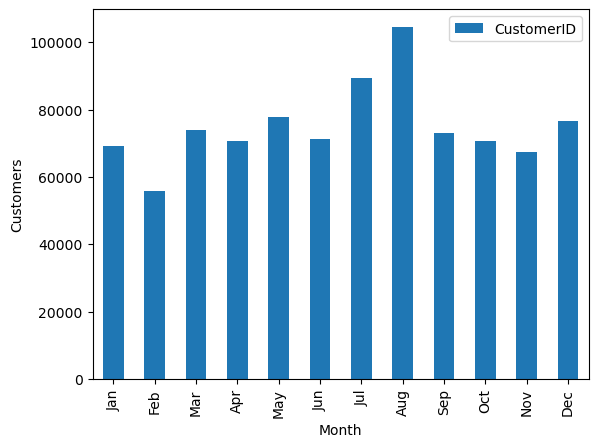

In [57]:
Piv_tab.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Customers')
plt.show()

In [58]:
#Analysing the retention of customers on month on month basis
Piv_tab['Retained_Customers'] = Piv_tab['CustomerID'].diff().fillna(0).astype(int)


In [59]:
Piv_tab

CustomerID  Retained_Customers
Month                                
Jan         69071                   0
Feb         55828              -13243
Mar         73882               18054
Apr         70550               -3332
May         77724                7174
Jun         71281               -6443
Jul         89267               17986
Aug        104550               15283
Sep         72896              -31654
Oct         70788               -2108
Nov         67337               -3451
Dec         76534                9197

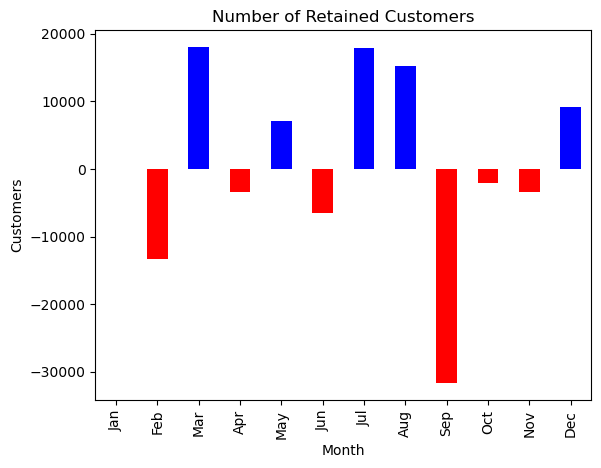

In [60]:
colors = ['blue' if x >= 0 else 'red' for x in Piv_tab['Retained_Customers']]
Piv_tab['Retained_Customers'].plot(kind='bar', color=colors)

plt.xlabel('Month')
plt.ylabel('Customers')
plt.title('Number of Retained Customers')

plt.show()

In [61]:
#Creating a column for Revenue that incorporates the discounted price and includes delivery charges
df['Revanue'] = (df['Avg_Price']-(df['Avg_Price']*(df['Discount_pct']/100)))+df['Delivery_Charges']

In [62]:
#The revenues from existing/new customers on month on month basis 
Piv_tab = df.pivot_table(index='Month',values='Revanue',aggfunc='sum')

In [63]:
Piv_tab = Piv_tab.reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
Piv_tab

Revanue
Month             
Jan    4846116.645
Feb    3211446.472
Mar    3363754.402
Apr    3413915.809
May    3136335.474
Jun    2842800.265
Jul    3887530.029
Aug    3944626.314
Sep    3250028.533
Oct    4907031.385
Nov    5182438.746
Dec    4970810.982

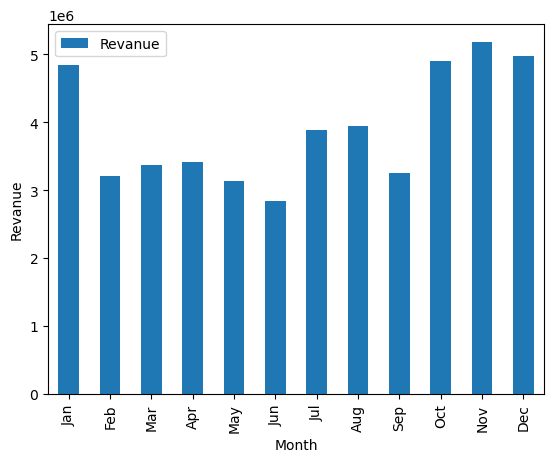

In [64]:
Piv_tab.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Revanue')
plt.show()

In [65]:
#Creating a column for discount amount
df['disc_amt'] = df['Avg_Price']*(df['Discount_pct']/100)

In [66]:
#Creating a Pivot table for total discount given on the basis of month
Piv_tab = df.pivot_table(index='Month',values='disc_amt',aggfunc='sum')

In [67]:
Piv_tab = Piv_tab.reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
Piv_tab.sort_values(by='disc_amt',ascending=False)

disc_amt
Month             
Dec    1854350.208
Nov    1158283.984
Sep    1094115.597
Mar     998638.038
Jun     945029.745
Aug     726483.406
May     608150.146
Feb     593691.068
Oct     458408.825
Jan     426555.245
Jul     339913.691
Apr     300969.581

It shows that the months with the highest revenue are those in which the highest total discounts were given

In [68]:
##KPIs 
df.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Gender', 'Location',
       'Tenure_Months', 'Month', 'Product_Category ', 'Coupon_Code',
       'Discount_pct', 'GST', 'discount_fract', 'Invoice_Value', 'Revanue',
       'disc_amt'],
      dtype='object')

# Total revanue by category, month,week and day

In [69]:
#total revanue by category
Piv_tab = df.pivot_table(index='Product_Category ',values='Revanue',aggfunc='sum')
Piv_tab

Revanue
Product_Category                 
Accessories           2762166.768
Android               2762166.768
Apparel               2762166.768
Bags                  2762166.768
Bottles               2762166.768
Drinkware             2762166.768
Gift Cards            2762166.768
Headgear              2762166.768
Housewares            2762166.768
Lifestyle             2762166.768
Nest                  2762166.768
Nest-Canada           2762166.768
Nest-USA              2762166.768
Notebooks             2762166.768
Notebooks & Journals  2762166.768
Office                2762166.768
Waze                  2762166.768

In [70]:
def charts(data):
    data.plot(kind='bar')
    plt.xlabel('')
    plt.ylabel('')
    plt.show()
    
   


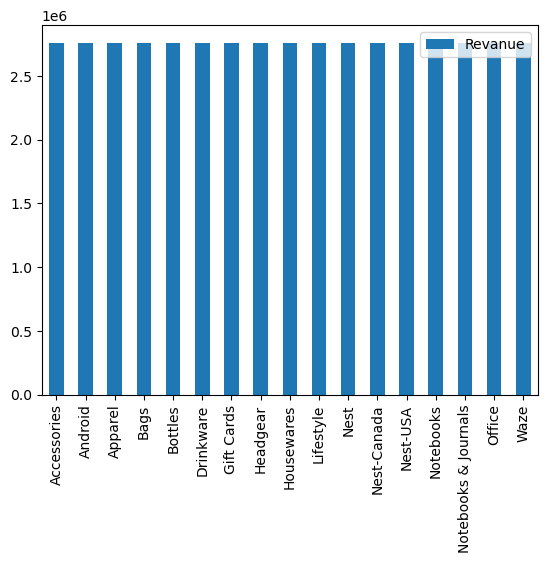

In [71]:
charts(Piv_tab)


In [72]:
#total revanue by week
df['Week'] = df['Transaction_Date'].dt.week

C:\Users\Pranav\AppData\Local\Temp\ipykernel_13976\546656322.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['Week'] = df['Transaction_Date'].dt.week


In [73]:
df

CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0            17850           16679       2019-01-01  GGOENEBJ079499   
1            17850           16679       2019-01-01  GGOENEBJ079499   
2            17850           16679       2019-01-01  GGOENEBJ079499   
3            17850           16679       2019-01-01  GGOENEBJ079499   
4            17850           16679       2019-01-01  GGOENEBJ079499   
...            ...             ...              ...             ...   
899703       14776           45163       2019-11-29  GGOENEBQ086499   
899704       14776           45163       2019-11-29  GGOENEBQ086499   
899705       14776           45163       2019-11-29  GGOENEBQ086499   
899706       14776           45163       2019-11-29  GGOENEBQ086499   
899707       14776           45163       2019-11-29  GGOENEBQ086499   

                                      Product_Description Product_Category  \
0       Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1       Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2       Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
3       Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
4       Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
...                                                   ...              ...   
899703                                  Nest Cam IQ - USA             Nest   
899704                                  Nest Cam IQ - USA             Nest   
899705                                  Nest Cam IQ - USA             Nest   
899706                                  Nest Cam IQ - USA             Nest   
899707                                  Nest Cam IQ - USA             Nest   

        Quantity  Avg_Price  Delivery_Charges Coupon_Status  ... Month  \
0              1     153.71               6.5          Used  ...   Jan   
1              1     153.71               6.5          Used  ...   Jan   
2              1     153.71               6.5          Used  ...   Jan   
3              1     153.71               6.5          Used  ...   Jan   
4              1     153.71               6.5          Used  ...   Jan   
...          ...        ...               ...           ...  ...   ...   
899703         1     199.00               6.5       Clicked  ...   Nov   
899704         1     199.00               6.5       Clicked  ...   Nov   
899705         1     199.00               6.5       Clicked  ...   Nov   
899706         1     199.00               6.5       Clicked  ...   Nov   
899707         1     199.00               6.5       Clicked  ...   Nov   

           Product_Category   Coupon_Code Discount_pct   GST discount_fract  \
0                    Apparel       SALE10           10  0.10            0.1   
1                   Nest-USA       ELEC10           10  0.10            0.1   
2                     Office        OFF10           10  0.10            0.1   
3                  Drinkware      EXTRA10           10  0.10            0.1   
4                  Lifestyle      EXTRA10           10  0.10            0.1   
...                      ...          ...          ...   ...            ...   
899703            Housewares        HOU20           20  0.05            0.2   
899704           Accessories        ACC20           20  0.05            0.2   
899705            Gift Cards         GC20           20  0.05            0.2   
899706  Notebooks & Journals         NJ20           20  0.05            0.2   
899707               Android        AND20           20  0.05            0.2   

        Invoice_Value  Revanue  disc_amt  Week  
0            158.6729  144.839    15.371     1  
1            158.6729  144.839    15.371     1  
2            158.6729  144.839    15.371     1  
3            158.6729  144.839    15.371     1  
4            158.6729  144.839    15.371     1  
...               ...      ...       ...   ...  
899703       173.6600  165.700    39.

In [74]:
Piv_tab = df.pivot_table(index=['Week'], values='Revanue', aggfunc='sum')
Piv_tab

Revanue
Week             
1     1255713.670
2      991424.632
3     1042996.427
4     1134941.335
5      995622.238
6      762157.532
7      771869.360
8      895523.382
9      706799.225
10     827715.363
11     680068.493
12     816538.339
13     705524.106
14     705201.701
15     824030.137
16     960279.714
17     788390.929
18     764264.444
19     677317.774
20     660021.566
21     713048.408
22     647926.627
23     595835.329
24     706811.074
25     713275.851
26     636647.994
27     710026.641
28     975469.537
29     976149.112
30     866089.208
31    1009699.071
32     950697.936
33     842520.272
34     788393.700
35     830357.724
36     618444.734
37     695771.852
38     739175.895
39    1001372.318
40    1046531.747
41    1309977.449
42    1091588.955
43     990490.261
44    1031000.819
45     974743.348
46    1008389.272
47    1334794.950
48    1519056.658
49    1237171.821
50    1365641.909
51    1389437.438
52     673896.779

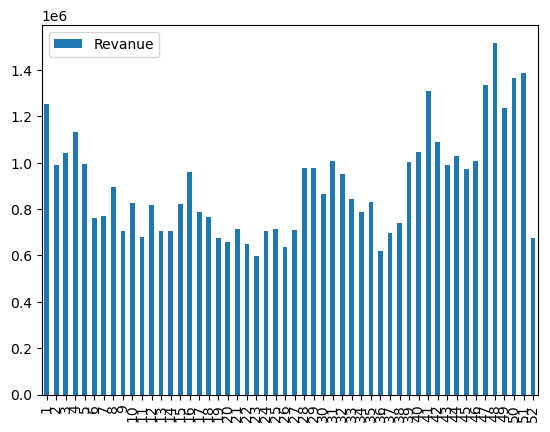

In [75]:
charts(Piv_tab)

In [76]:
#total revanue by day
df['Day'] = df['Transaction_Date'].dt.day_name()

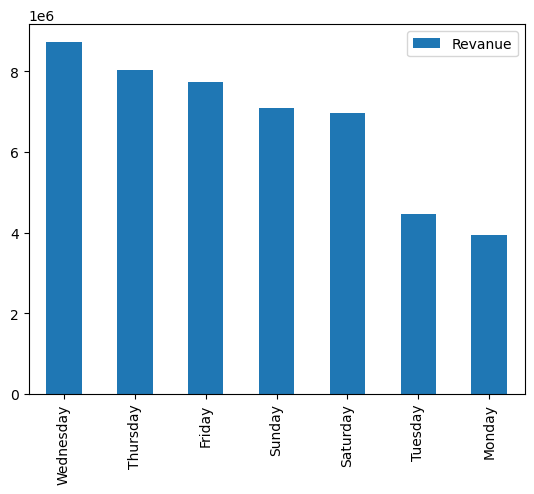

In [77]:
Piv_tab = df.pivot_table(index=['Day'], values='Revanue', aggfunc='sum').sort_values(by='Revanue',ascending=False)
Piv_tab
charts(Piv_tab)

# Total number of orders by category, month,week and day

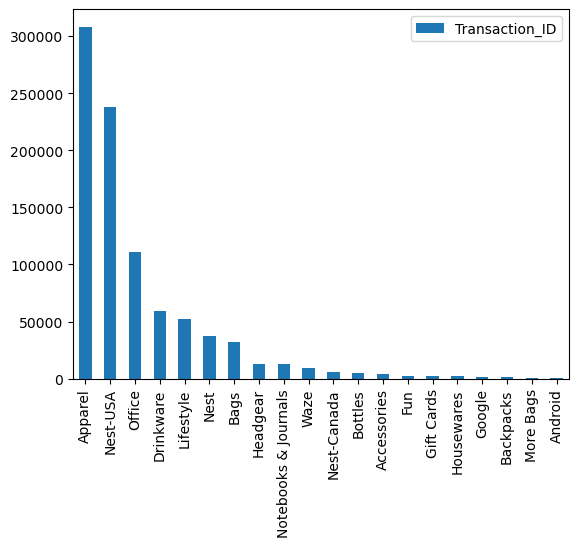

In [78]:
#number of orders by category
Piv_tab = df.pivot_table(index='Product_Category', values='Transaction_ID', aggfunc='count').sort_values(by='Transaction_ID',ascending=False)
Piv_tab
charts(Piv_tab)

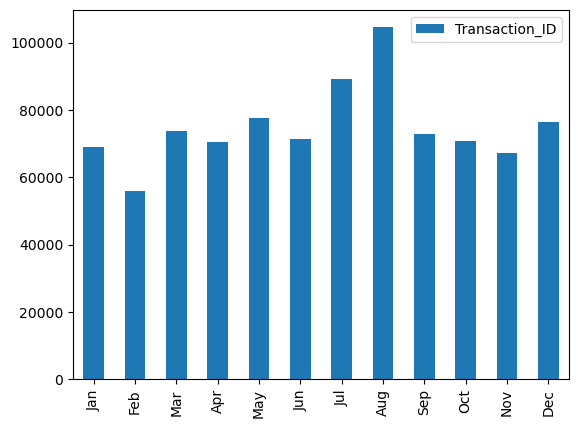

In [79]:
#number of orders by months
Piv_tab = df.pivot_table(index='Month', values='Transaction_ID', aggfunc='count')
Piv_tab = Piv_tab.reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
Piv_tab
charts(Piv_tab)

In [80]:
df

CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0            17850           16679       2019-01-01  GGOENEBJ079499   
1            17850           16679       2019-01-01  GGOENEBJ079499   
2            17850           16679       2019-01-01  GGOENEBJ079499   
3            17850           16679       2019-01-01  GGOENEBJ079499   
4            17850           16679       2019-01-01  GGOENEBJ079499   
...            ...             ...              ...             ...   
899703       14776           45163       2019-11-29  GGOENEBQ086499   
899704       14776           45163       2019-11-29  GGOENEBQ086499   
899705       14776           45163       2019-11-29  GGOENEBQ086499   
899706       14776           45163       2019-11-29  GGOENEBQ086499   
899707       14776           45163       2019-11-29  GGOENEBQ086499   

                                      Product_Description Product_Category  \
0       Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1       Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2       Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
3       Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
4       Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
...                                                   ...              ...   
899703                                  Nest Cam IQ - USA             Nest   
899704                                  Nest Cam IQ - USA             Nest   
899705                                  Nest Cam IQ - USA             Nest   
899706                                  Nest Cam IQ - USA             Nest   
899707                                  Nest Cam IQ - USA             Nest   

        Quantity  Avg_Price  Delivery_Charges Coupon_Status  ...  \
0              1     153.71               6.5          Used  ...   
1              1     153.71               6.5          Used  ...   
2              1     153.71               6.5          Used  ...   
3              1     153.71               6.5          Used  ...   
4              1     153.71               6.5          Used  ...   
...          ...        ...               ...           ...  ...   
899703         1     199.00               6.5       Clicked  ...   
899704         1     199.00               6.5       Clicked  ...   
899705         1     199.00               6.5       Clicked  ...   
899706         1     199.00               6.5       Clicked  ...   
899707         1     199.00               6.5       Clicked  ...   

           Product_Category  Coupon_Code  Discount_pct   GST discount_fract  \
0                    Apparel      SALE10            10  0.10            0.1   
1                   Nest-USA      ELEC10            10  0.10            0.1   
2                     Office       OFF10            10  0.10            0.1   
3                  Drinkware     EXTRA10            10  0.10            0.1   
4                  Lifestyle     EXTRA10            10  0.10            0.1   
...                      ...         ...           ...   ...            ...   
899703            Housewares       HOU20            20  0.05            0.2   
899704           Accessories       ACC20            20  0.05            0.2   
899705            Gift Cards        GC20            20  0.05            0.2   
899706  Notebooks & Journals        NJ20            20  0.05            0.2   
899707               Android       AND20            20  0.05            0.2   

       Invoice_Value  Revanue  disc_amt  Week      Day  
0           158.6729  144.839    15.371     1  Tuesday  
1           158.6729  144.839    15.371     1  Tuesday  
2           158.6729  144.839    15.371     1  Tuesday  
3           158.6729  144.839    15.371     1  Tuesday  
4           158.6729  144.839    15.371     1  Tuesday  
...              ...      ...       ...   ...      ...  
899703      173.6600  165.700    39.800    48   Frida

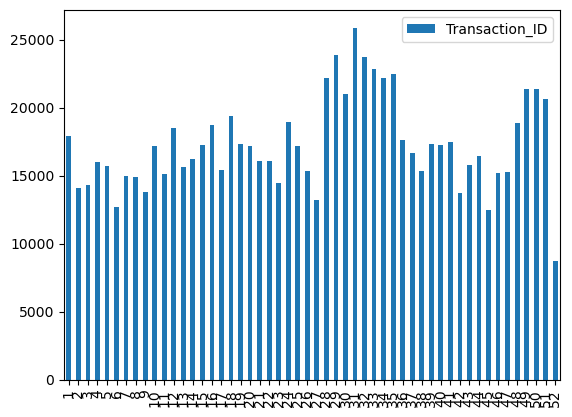

In [81]:
#number of orders by week
Piv_tab = df.pivot_table(index='Week', values='Transaction_ID', aggfunc='count')

Piv_tab
charts(Piv_tab)

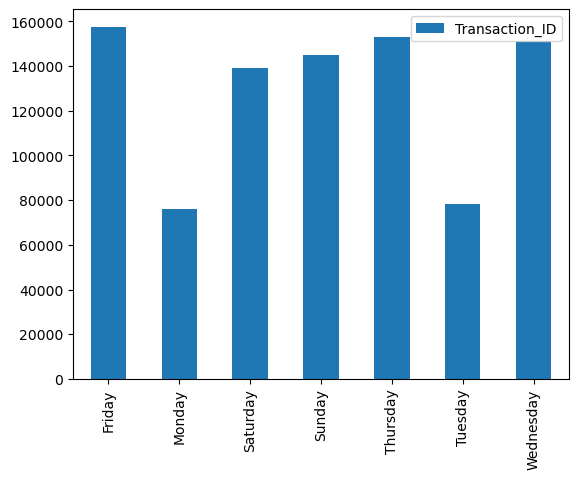

In [82]:
#number of orders by day
Piv_tab = df.pivot_table(index='Day', values='Transaction_ID', aggfunc='count')
Piv_tab
charts(Piv_tab)

# average order value by category, month,week and day

In [83]:
df['AOV'] = df['Revanue'].sum()/df['Transaction_ID'].sum()

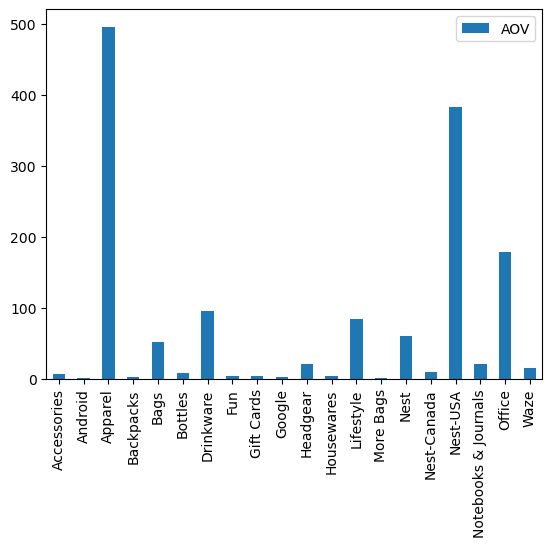

In [84]:
# average order value by category
Piv_tab = df.pivot_table(index='Product_Category', values='AOV', aggfunc='sum')
charts(Piv_tab)

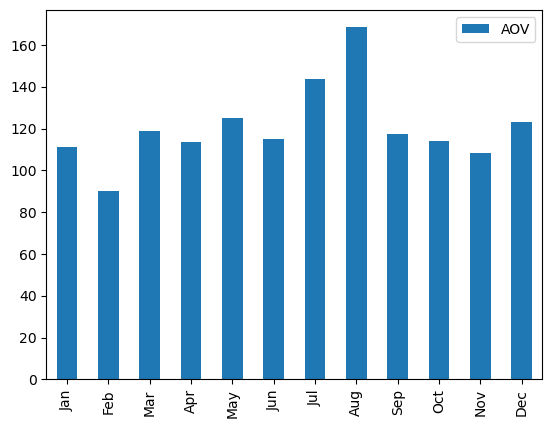

In [85]:
# average order value by month
Piv_tab = df.pivot_table(index='Month', values='AOV', aggfunc='sum')
Piv_tab = Piv_tab.reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
charts(Piv_tab)

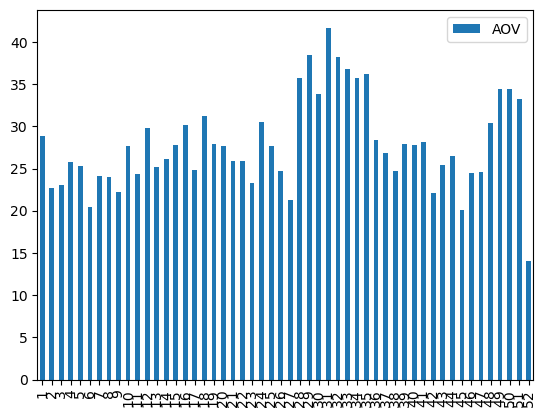

In [86]:
# average order value by week
Piv_tab = df.pivot_table(index='Week', values='AOV', aggfunc='sum')
charts(Piv_tab)

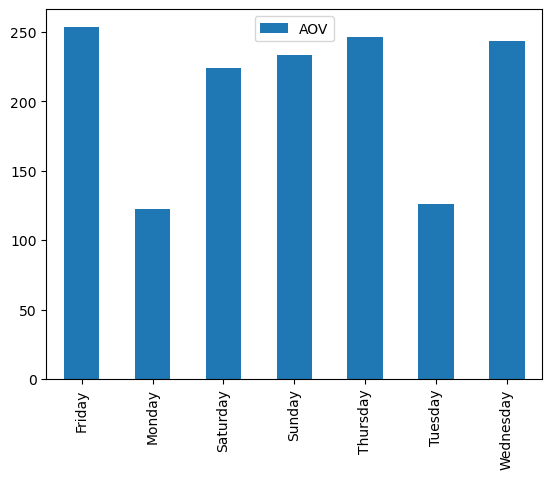

In [87]:
# average order value by day
Piv_tab = df.pivot_table(index='Day', values='AOV', aggfunc='sum')
charts(Piv_tab)

# Total number of customers by category, month,week and day

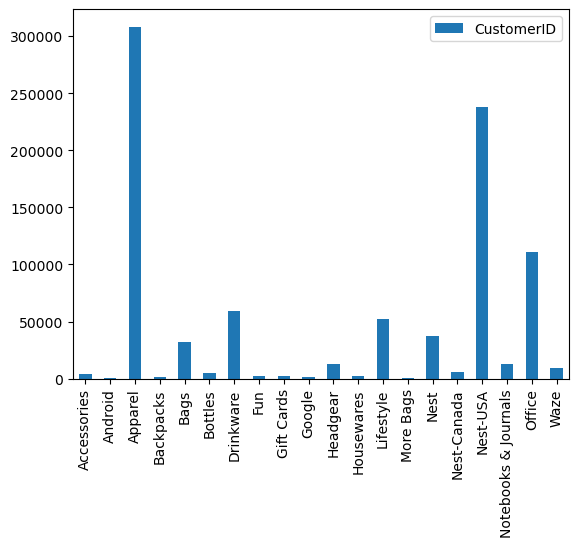

In [88]:
#customers by category
Piv_tab = df.pivot_table(index='Product_Category', values='CustomerID', aggfunc='count')
charts(Piv_tab)

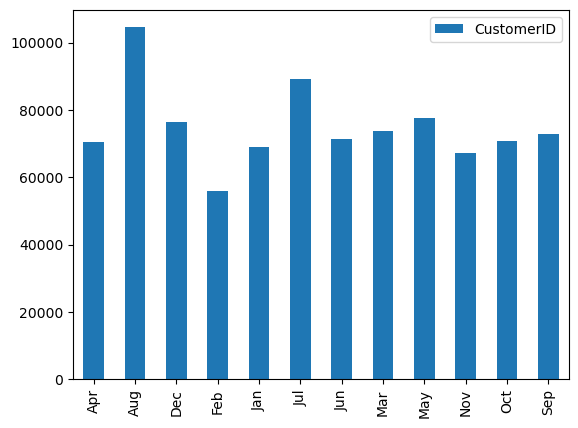

In [89]:
#customers by month
Piv_tab = df.pivot_table(index='Month', values='CustomerID', aggfunc='count')
charts(Piv_tab)

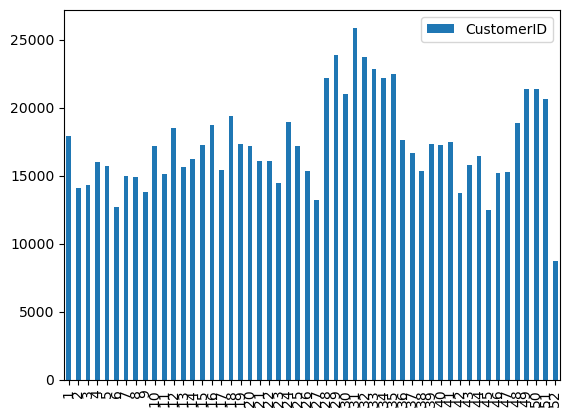

In [90]:
#customers by week
Piv_tab = df.pivot_table(index='Week', values='CustomerID', aggfunc='count')
charts(Piv_tab)

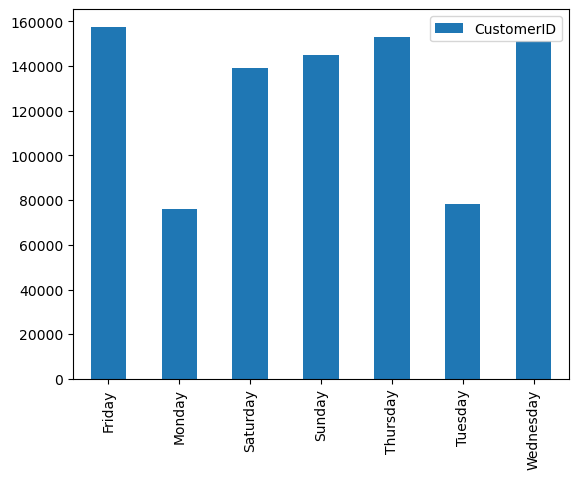

In [91]:
#customers by day
Piv_tab = df.pivot_table(index='Day', values='CustomerID', aggfunc='count')
charts(Piv_tab)

# The trends/seasonality of sales by category, location, month

In [92]:
Piv_tab = df.pivot_table(index='Month', values='Transaction_ID', aggfunc='count')
Piv_tab = Piv_tab.reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

Text(0.5, 1.0, 'Monthly Sales Trend')

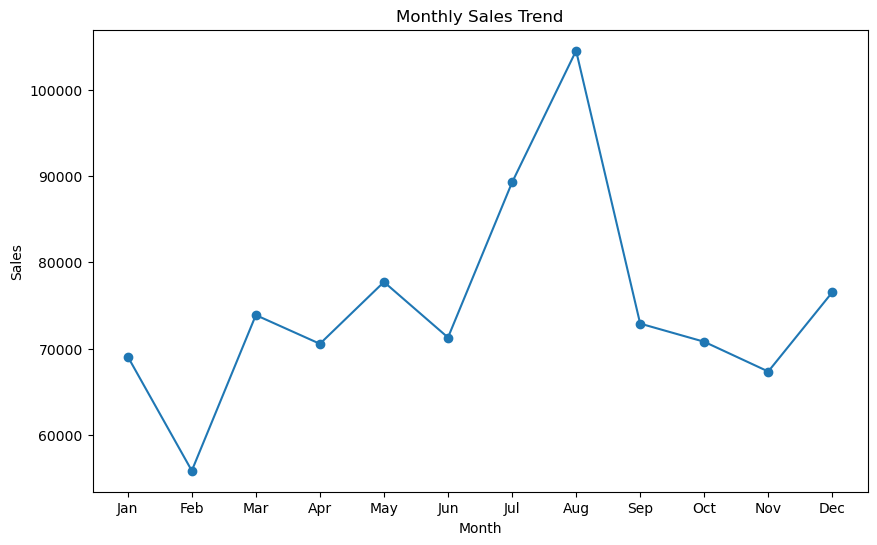

In [93]:
plt.figure(figsize=(10, 6))
plt.plot(Piv_tab, marker='o', linestyle='-')  


plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales Trend')

In [94]:
Piv_tab = df.pivot_table(index='Product_Category', values='Transaction_ID', aggfunc='count')

Text(0.5, 1.0, 'Category Sales Trend')

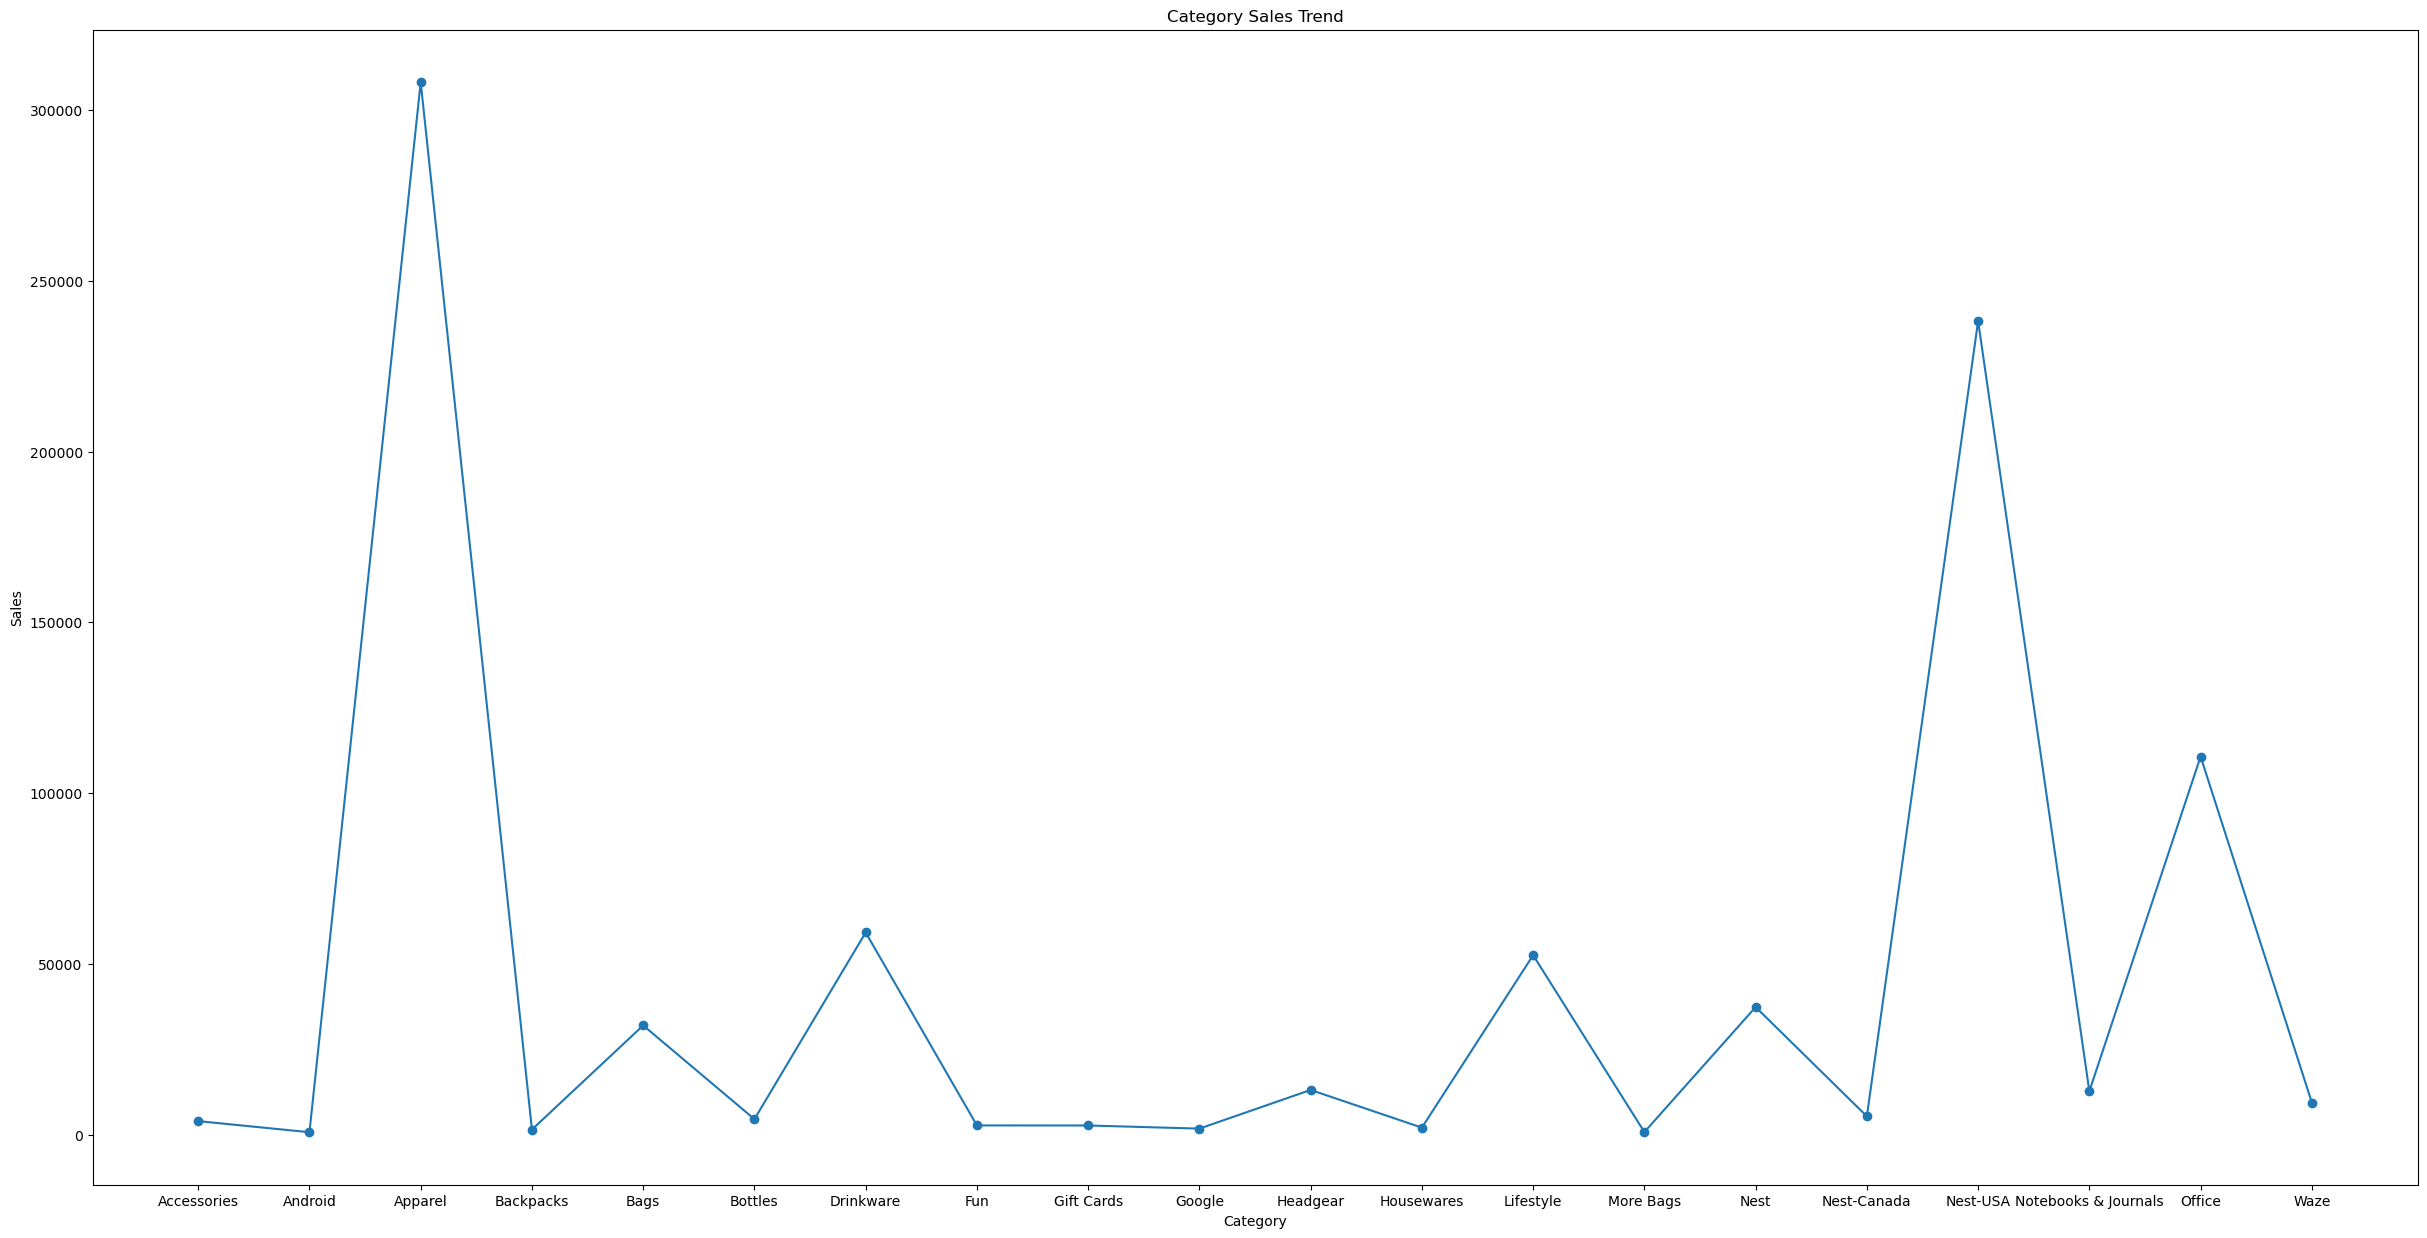

In [95]:
plt.figure(figsize=(30, 15))
plt.plot(Piv_tab, marker='o', linestyle='-')  


plt.xlabel('Category')
plt.ylabel('Sales')
plt.title('Category Sales Trend')

In [96]:
Piv_tab = df.pivot_table(index='Location', values='Transaction_ID', aggfunc='count')

Text(0.5, 1.0, 'location Sales Trend')

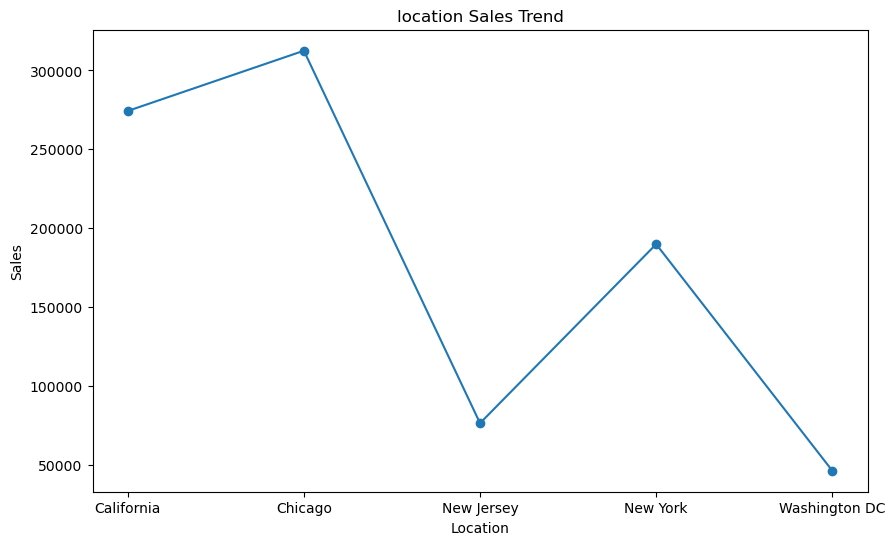

In [97]:
plt.figure(figsize=(10, 6))
plt.plot(Piv_tab, marker='o', linestyle='-')  


plt.xlabel('Location')
plt.ylabel('Sales')
plt.title('location Sales Trend')

In [98]:
#number order varies and sales with different days
Piv_tab = df.pivot_table(index='Day', values='Transaction_ID', aggfunc='count')
Piv_tab = Piv_tab.reindex(['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])

Text(0.5, 1.0, 'Day Sales Trend')

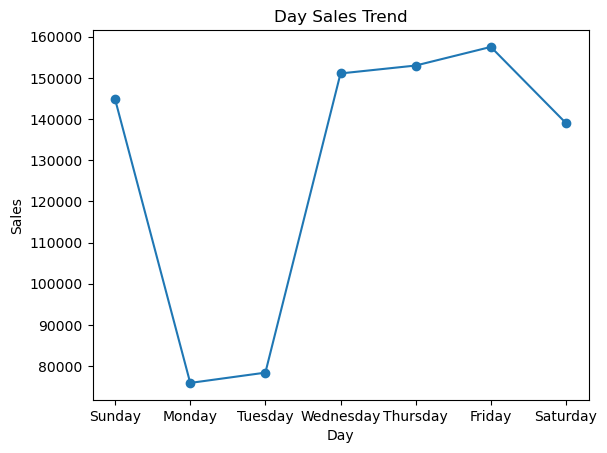

In [99]:
plt.figure()
plt.plot(Piv_tab, marker='o', linestyle='-')  


plt.xlabel('Day')
plt.ylabel('Sales')
plt.title('Day Sales Trend')

# Calculate the Revenue, Marketing spend, percentage of marketing spend out of revenue, Tax, percentage of delivery charges by month

In [100]:
#Calculating revanue out of tax and percentage of delivery  spend by month
#Here i already calculated my revanue out of  delivery charges. So no need to do it again

df['revanue_without_tax'] = df['Revanue'] - (df['Revanue']*df['GST'])

In [101]:
Piv_tab = df.pivot_table(index='Month', values='revanue_without_tax', aggfunc='sum')
Piv_tab = Piv_tab.reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
Piv_tab

revanue_without_tax
Month                     
Jan           4.282482e+06
Feb           2.817233e+06
Mar           2.936350e+06
Apr           2.990304e+06
May           2.739249e+06
Jun           2.492808e+06
Jul           3.410364e+06
Aug           3.458385e+06
Sep           2.901997e+06
Oct           4.425716e+06
Nov           4.728535e+06
Dec           4.500334e+06

In [102]:
df

CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0            17850           16679       2019-01-01  GGOENEBJ079499   
1            17850           16679       2019-01-01  GGOENEBJ079499   
2            17850           16679       2019-01-01  GGOENEBJ079499   
3            17850           16679       2019-01-01  GGOENEBJ079499   
4            17850           16679       2019-01-01  GGOENEBJ079499   
...            ...             ...              ...             ...   
899703       14776           45163       2019-11-29  GGOENEBQ086499   
899704       14776           45163       2019-11-29  GGOENEBQ086499   
899705       14776           45163       2019-11-29  GGOENEBQ086499   
899706       14776           45163       2019-11-29  GGOENEBQ086499   
899707       14776           45163       2019-11-29  GGOENEBQ086499   

                                      Product_Description Product_Category  \
0       Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1       Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2       Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
3       Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
4       Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
...                                                   ...              ...   
899703                                  Nest Cam IQ - USA             Nest   
899704                                  Nest Cam IQ - USA             Nest   
899705                                  Nest Cam IQ - USA             Nest   
899706                                  Nest Cam IQ - USA             Nest   
899707                                  Nest Cam IQ - USA             Nest   

        Quantity  Avg_Price  Delivery_Charges Coupon_Status  ... Discount_pct  \
0              1     153.71               6.5          Used  ...           10   
1              1     153.71               6.5          Used  ...           10   
2              1     153.71               6.5          Used  ...           10   
3              1     153.71               6.5          Used  ...           10   
4              1     153.71               6.5          Used  ...           10   
...          ...        ...               ...           ...  ...          ...   
899703         1     199.00               6.5       Clicked  ...           20   
899704         1     199.00               6.5       Clicked  ...           20   
899705         1     199.00               6.5       Clicked  ...           20   
899706         1     199.00               6.5       Clicked  ...           20   
899707         1     199.00               6.5       Clicked  ...           20   

         GST  discount_fract Invoice_Value  Revanue disc_amt  Week      Day  \
0       0.10             0.1      158.6729  144.839   15.371     1  Tuesday   
1       0.10             0.1      158.6729  144.839   15.371     1  Tuesday   
2       0.10             0.1      158.6729  144.839   15.371     1  Tuesday   
3       0.10             0.1      158.6729  144.839   15.371     1  Tuesday   
4       0.10             0.1      158.6729  144.839   15.371     1  Tuesday   
...      ...             ...           ...      ...      ...   ...      ...   
899703  0.05             0.2      173.6600  165.700   39.800    48   Friday   
899704  0.05             0.2      173.6600  165.700   39.800    48   Friday   
899705  0.05             0.2      173.6600  165.700   39.800    48   Friday   
899706  0.05             0.2      173.6600  165.700   39.800    48   Friday   
899707  0.05             0.2      173.6600  165.700   39.800    48   Friday   

            AOV  revanue_without_tax  
0       0.00161             130.3551  
1       0.00161             130.3551  
2       0.00161             130.3551  
3       0.00161             130.3551  
4       0.00161             130.3551  
...         ...                  ...  
899703  0.00161        

In [103]:
#Need to merge Marketing_Spend with df
marketing_spend['Date'] = pd.to_datetime(marketing_spend['Date'])

In [104]:
df = pd.merge(df,marketing_spend,left_on='Transaction_Date',right_on='Date',how='inner')

In [105]:
df

CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0            17850           16679       2019-01-01  GGOENEBJ079499   
1            17850           16679       2019-01-01  GGOENEBJ079499   
2            17850           16679       2019-01-01  GGOENEBJ079499   
3            17850           16679       2019-01-01  GGOENEBJ079499   
4            17850           16679       2019-01-01  GGOENEBJ079499   
...            ...             ...              ...             ...   
899703       16686           31810       2019-07-04  GGOEADHH055999   
899704       16686           31810       2019-07-04  GGOEADHH055999   
899705       16686           31810       2019-07-04  GGOEADHH055999   
899706       16686           31810       2019-07-04  GGOEADHH055999   
899707       16686           31810       2019-07-04  GGOEADHH055999   

                                      Product_Description Product_Category  \
0       Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1       Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2       Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
3       Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
4       Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
...                                                   ...              ...   
899703                               22 oz Android Bottle          Bottles   
899704                               22 oz Android Bottle          Bottles   
899705                               22 oz Android Bottle          Bottles   
899706                               22 oz Android Bottle          Bottles   
899707                               22 oz Android Bottle          Bottles   

        Quantity  Avg_Price  Delivery_Charges Coupon_Status  ...  \
0              1     153.71               6.5          Used  ...   
1              1     153.71               6.5          Used  ...   
2              1     153.71               6.5          Used  ...   
3              1     153.71               6.5          Used  ...   
4              1     153.71               6.5          Used  ...   
...          ...        ...               ...           ...  ...   
899703         1       2.99               6.0       Clicked  ...   
899704         1       2.99               6.0       Clicked  ...   
899705         1       2.99               6.0       Clicked  ...   
899706         1       2.99               6.0       Clicked  ...   
899707         1       2.99               6.0       Clicked  ...   

       Invoice_Value  Revanue  disc_amt Week       Day      AOV  \
0          158.67290  144.839    15.371    1   Tuesday  0.00161   
1          158.67290  144.839    15.371    1   Tuesday  0.00161   
2          158.67290  144.839    15.371    1   Tuesday  0.00161   
3          158.67290  144.839    15.371    1   Tuesday  0.00161   
4          158.67290  144.839    15.371    1   Tuesday  0.00161   
...              ...      ...       ...  ...       ...      ...   
899703       8.82555    8.691     0.299   27  Thursday  0.00161   
899704       8.82555    8.691     0.299   27  Thursday  0.00161   
899705       8.82555    8.691     0.299   27  Thursday  0.00161   
899706       8.82555    8.691     0.299   27  Thursday  0.00161   
899707       8.82555    8.691     0.299   27  Thursday  0.00161   

        revanue_without_tax       Date  Offline_Spend  Online_Spend  
0                 130.35510 2019-01-01           4500       2424.50  
1                 130.35510 2019-01-01           4500       2424.50  
2                 130.35510 2019-01-01           4500       2424.50  
3                 130.35510 2019-01-01           4500       2424.50  
4                 130.35510 2019-01-01           4500       2424.50  
...                     ...        ...            ...           ...  
899703              8.25645 2019-07-04           2000       2227.95  
899704              8.25645 2019-07-

In [106]:
df['total_spend'] = df['Offline_Spend'] + df['Online_Spend']

In [107]:
#Calculating total_spend out of revanue,tax and percentage of delivery  spend by month
df['total_spend_without'] = df['total_spend'] - df['revanue_without_tax']

In [108]:
Piv_tab = df.pivot_table(index='Month', values='total_spend_without', aggfunc='sum')
Piv_tab = Piv_tab.reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
Piv_tab

total_spend_without
Month                     
Jan           3.366147e+08
Feb           2.664889e+08
Mar           2.937779e+08
Apr           3.651604e+08
May           2.951946e+08
Jun           3.141391e+08
Jul           3.471115e+08
Aug           4.790991e+08
Sep           3.244777e+08
Oct           3.446909e+08
Nov           3.539086e+08
Dec           4.878945e+08

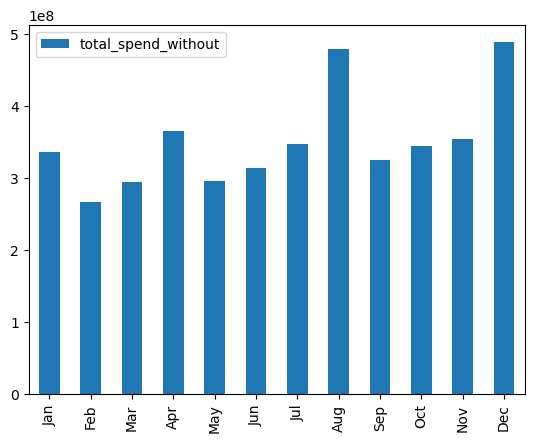

In [109]:
charts(Piv_tab)

In [110]:
#Created a pivot table ordered by the highest spending month-wise
Piv_tab = df.pivot_table(index='Month', values=['Revanue','total_spend'], aggfunc='sum').sort_values(by='total_spend',ascending=False)

pd.options.display.float_format = '{:.2f}'.format
Piv_tab

Revanue  total_spend
Month                        
Dec   4970810.98 492394834.17
Aug   3944626.31 482557474.09
Apr   3413915.81 368150676.21
Nov   5182438.75 358637094.73
Jul   3887530.03 350521884.97
Oct   4907031.38 349116630.63
Jan   4846116.64 340897177.89
Sep   3250028.53 327379647.78
Jun   2842800.27 316631863.41
May   3136335.47 297933857.34
Mar   3363754.40 296714265.27
Feb   3211446.47 269306112.85

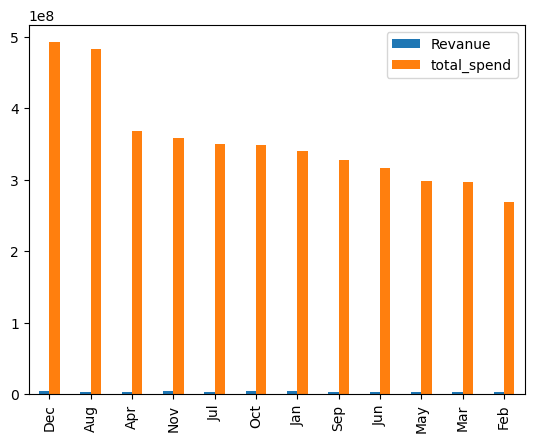

In [111]:
charts(Piv_tab)

Analyzing the correlation between marketing spending and revenue reveals that increased investment in marketing is associated with higher revenue.

In [112]:
Piv_tab = df.pivot_table(index='Product_Description', values='Transaction_ID', aggfunc='count').sort_values(by='Transaction_ID',ascending=False)

In [113]:
Piv_tab

Transaction_ID
Product_Description                                               
Nest Learning Thermostat 3rd Gen-USA - Stainles...           59687
Nest Cam Outdoor Security Camera - USA                       56576
Nest Cam Indoor Security Camera - USA                        54910
Google Sunglasses                                            25891
Nest Protect Smoke + CO White Battery Alarm-USA              23137
...                                                            ...
Google Tee Red                                                  34
Google Large Standard Journal Grey                              17
Google Women's Colorblock Tee White                             17
Android Women's Short Sleeve Tri-blend Badge Te...              17
Compact Journal with Recycled Pages                             17

[404 rows x 1 columns]

The following products appeared in the transactions.

In [114]:
Piv_tab = df.pivot_table(index='Product_Description', values='Quantity', aggfunc='count').sort_values(by='Quantity',ascending=False)
Piv_tab

Quantity
Product_Description                                         
Nest Learning Thermostat 3rd Gen-USA - Stainles...     59687
Nest Cam Outdoor Security Camera - USA                 56576
Nest Cam Indoor Security Camera - USA                  54910
Google Sunglasses                                      25891
Nest Protect Smoke + CO White Battery Alarm-USA        23137
...                                                      ...
Google Tee Red                                            34
Google Large Standard Journal Grey                        17
Google Women's Colorblock Tee White                       17
Android Women's Short Sleeve Tri-blend Badge Te...        17
Compact Journal with Recycled Pages                       17

[404 rows x 1 columns]

The most purchased product, based on quantity, is the 'Nest Learning Thermostat 3rd Gen-USA - Stainless Steel'.

# 3. Performing Customer Segmentation 

In [115]:
#creating recency,frequency,monetary

In [116]:
cust_seg = df.groupby('CustomerID')['Transaction_Date'].max().reset_index()

In [117]:
#recency
cust_seg['recency'] = df['Transaction_Date'].max() - cust_seg['Transaction_Date']

In [138]:
frequency = df.groupby('CustomerID')['Transaction_ID'].count().reset_index()

In [141]:
frequency.drop('CustomerID',axis=1,inplace=True)

In [142]:
#frequency
cust_seg['frequency'] = frequency

In [144]:
monetary = df.groupby('CustomerID')['Revanue'].sum().reset_index()

In [145]:
monetary.drop('CustomerID',axis=1,inplace=True)

In [146]:
#monetory
cust_seg['monetory'] = monetary

In [148]:
cust_seg.drop('Transaction_Date',axis=1,inplace=True)

In [149]:
cust_seg

CustomerID  recency  frequency  monetory
0          12346 107 days         34   2853.33
1          12347  59 days       1020  59783.88
2          12348  73 days        391   7688.83
3          12350  17 days        289  17791.52
4          12356 107 days        612  25650.81
...          ...      ...        ...       ...
1463       18259 270 days        119   6027.98
1464       18260  87 days        680  24956.60
1465       18269 194 days        136   2192.46
1466       18277  69 days         17   2381.70
1467       18283  82 days       1734  98768.98

[1468 rows x 4 columns]

In [152]:
#creating an RFM score
quantiles = cust_seg.quantile(q=[0.25, 0.5, 0.75])


def assign_rfm_score(x, quantile):
    if x <= quantile[0.25]:
        return 1
    elif x <= quantile[0.5]:
        return 2
    elif x <= quantile[0.75]:
        return 3
    else:
        return 4




In [154]:
cust_seg['Frequency_Score'] = cust_seg['frequency'].apply(assign_rfm_score, args=(quantiles['frequency'],))
cust_seg['Monetary_Score'] = cust_seg['monetory'].apply(assign_rfm_score, args=(quantiles['monetory'],))


In [155]:
def assign_rfm_score(x, quantile):
    if x <= quantile[0.25]:
        return 4
    elif x <= quantile[0.5]:
        return 3
    elif x <= quantile[0.75]:
        return 2
    else:
        return 1

In [164]:
quantiles = cust_seg['recency'].quantile(q=[0.25, 0.5, 0.75])

In [165]:
cust_seg['Recency_Score'] = cust_seg['recency'].apply(assign_rfm_score, args=(quantiles,))

In [166]:
cust_seg

CustomerID  recency  frequency  monetory  Frequency_Score  \
0          12346 107 days         34   2853.33                1   
1          12347  59 days       1020  59783.88                4   
2          12348  73 days        391   7688.83                3   
3          12350  17 days        289  17791.52                2   
4          12356 107 days        612  25650.81                3   
...          ...      ...        ...       ...              ...   
1463       18259 270 days        119   6027.98                1   
1464       18260  87 days        680  24956.60                3   
1465       18269 194 days        136   2192.46                1   
1466       18277  69 days         17   2381.70                1   
1467       18283  82 days       1734  98768.98                4   

      Monetary_Score  Recency_Score  
0                  1              3  
1                  4              3  
2                  2              3  
3                  2              4  
4                  3              3  
...              ...            ...  
1463               1              1  
1464               3              3  
1465               1              2  
1466               1              3  
1467               4              3  

[1468 rows x 7 columns]

In [168]:
cust_seg['segmentation'] = np.where((cust_seg['Frequency_Score'] == 4) & (cust_seg['Monetary_Score'] == 4) |
                                    (cust_seg['Frequency_Score'] == 3) & (cust_seg['Monetary_Score'] == 4) |
                                    (cust_seg['Frequency_Score'] == 4) & (cust_seg['Monetary_Score'] == 3),'Premium',
                           np.where((cust_seg['Frequency_Score'] == 3) & (cust_seg['Monetary_Score'] == 3) |
                                    (cust_seg['Frequency_Score'] == 3) & (cust_seg['Monetary_Score'] == 2) |
                                    (cust_seg['Frequency_Score'] == 2) & (cust_seg['Monetary_Score'] == 3),'Gold',
                           np.where((cust_seg['Frequency_Score'] == 2) & (cust_seg['Monetary_Score'] == 2) |
                                    (cust_seg['Frequency_Score'] == 2) & (cust_seg['Monetary_Score'] == 1) |
                                    (cust_seg['Frequency_Score'] == 1) & (cust_seg['Monetary_Score'] == 2),'Silver','Bronze')))

In [170]:
cust_seg['segmentation'].value_counts()

Premium    423
Gold       374
Silver     364
Bronze     307
Name: segmentation, dtype: int64

In [172]:
cust_seg['status'] = np.where(cust_seg['Recency_Score'] == 4,'High_active',
                     np.where(cust_seg['Recency_Score'] == 3,'Active',
                     np.where(cust_seg['Recency_Score'] == 2,'Inactive','Churner')))

In [174]:
pd.crosstab(cust_seg['segmentation'],cust_seg['status'])

status        Active  Churner  High_active  Inactive
segmentation                                        
Bronze            68      106           39        94
Gold              94       85          107        88
Premium          125       69          154        75
Silver            85      106           69       104

1. The Premium segment has the highest number of total customers, indicating that it might be a significant revenue generator for the business.

2. However, despite having the highest number of customers, the Premium segment also has the highest number of churners, suggesting a need to focus on retention strategies to reduce churn and retain these valuable customers.

3. The Gold segment has a relatively high percentage of highly active customers, indicating that this segment might be particularly engaged with the product or service. Therefore, efforts to further engage and retain these customers could be beneficial.

4. The siver and bronze segment has a high percentage of inactive customers, suggesting a need to implement strategies to re-engage these customers and increase their activity levels to prevent further churn.

5. In summary, while the Premium segment presents an opportunity for revenue growth, reducing churn in this segment is crucial. Additionally, efforts to engage and retain customers in the Gold segment and reactivate inactive customers in the Silver and Bronze segment could lead to overall improvement in customer retention and satisfaction.

# 4. Predicting Customer Lifetime Value (Low Value/Medium Value/High Value) 

In [175]:
#First define dependent variable with categories low value, medium value, high value using customer revenue
data = df.groupby('CustomerID')['Revanue'].sum().reset_index()

In [176]:
data

CustomerID  Revanue
0          12346  2853.33
1          12347 59783.88
2          12348  7688.83
3          12350 17791.52
4          12356 25650.81
...          ...      ...
1463       18259  6027.98
1464       18260 24956.60
1465       18269  2192.46
1466       18277  2381.70
1467       18283 98768.98

[1468 rows x 2 columns]

In [177]:
#dividing revanue into 3 quantiles
q1 = data['Revanue'].quantile(0.25)
q3 = data['Revanue'].quantile(0.75)

In [178]:
#creating a function for assigning the cutomer value
def cust_cat(rev):
    if rev<=q1:
        return 'Low_Value'
    elif rev>q1 and rev<=q3:
        return 'Medium_Value'
    else:
        return 'High_Value'

In [179]:
data['Value_Category'] = data['Revanue'].apply(cust_cat)

In [180]:
data['Value_Category'].value_counts()

Medium_Value    734
Low_Value       367
High_Value      367
Name: Value_Category, dtype: int64

In [181]:
df = pd.merge(df,data[['CustomerID','Value_Category']],on='CustomerID')

In [109]:
#building the classification model

In [182]:
df.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Gender', 'Location',
       'Tenure_Months', 'Month', 'Product_Category ', 'Coupon_Code',
       'Discount_pct', 'GST', 'discount_fract', 'Invoice_Value', 'Revanue',
       'disc_amt', 'Week', 'Day', 'AOV', 'revanue_without_tax', 'Date',
       'Offline_Spend', 'Online_Spend', 'total_spend', 'total_spend_without',
       'Value_Category'],
      dtype='object')

In [183]:
#cleaning the data
new_df = df.drop(['CustomerID','Transaction_ID','Product_SKU','Product_Description'],axis=1)

In [184]:
#preparing for encoding
count = new_df['Product_Category'].value_counts()

tot_count = count.sum()

perce = (count/tot_count)*100
perce

Apparel                34.25
Nest-USA               26.48
Office                 12.31
Drinkware               6.58
Lifestyle               5.84
Nest                    4.15
Bags                    3.56
Headgear                1.46
Notebooks & Journals    1.42
Waze                    1.05
Nest-Canada             0.60
Bottles                 0.51
Accessories             0.44
Fun                     0.30
Gift Cards              0.30
Housewares              0.23
Google                  0.20
Backpacks               0.17
More Bags               0.09
Android                 0.08
Name: Product_Category, dtype: float64

In [185]:
threshold_category = 'Drinkware'                 


new_labels = {}


for category, percentage in perce.items():

    if category != threshold_category:
        new_labels[category] = category
    else:
        new_labels[category] = 'Others'
        break  


new_df['Grouped_Category'] = new_df['Product_Category'].map(new_labels).fillna('Others')


In [186]:
new_df['Grouped_Category'].value_counts()

Apparel     308142
Others      242624
Nest-USA    238221
Office      110721
Name: Grouped_Category, dtype: int64

In [187]:
#creating a function for encoding
def one_hot_encode_columns(data, columns, drop_first=True):
    return pd.get_dummies(data, columns=columns, drop_first=drop_first)

In [188]:
#appying the columns into the function
new_df = one_hot_encode_columns(new_df,['Coupon_Status','Gender','Location'],drop_first=True)

In [189]:
new_df.columns

Index(['Transaction_Date', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Tenure_Months', 'Month', 'Product_Category ',
       'Coupon_Code', 'Discount_pct', 'GST', 'discount_fract', 'Invoice_Value',
       'Revanue', 'disc_amt', 'Week', 'Day', 'AOV', 'revanue_without_tax',
       'Date', 'Offline_Spend', 'Online_Spend', 'total_spend',
       'total_spend_without', 'Value_Category', 'Grouped_Category',
       'Coupon_Status_Not Used', 'Coupon_Status_Used', 'Gender_M',
       'Location_Chicago', 'Location_New Jersey', 'Location_New York',
       'Location_Washington DC'],
      dtype='object')

In [190]:
#dropping the unnecessary columns
new_df = new_df.drop(['Product_Category','Coupon_Code','Transaction_Date','Date','Day','Week','Month','Grouped_Category','Product_Category '],axis=1)

In [191]:
new_df

Quantity  Avg_Price  Delivery_Charges  Tenure_Months  Discount_pct  \
0              1     153.71              6.50             12            10   
1              1     153.71              6.50             12            10   
2              1     153.71              6.50             12            10   
3              1     153.71              6.50             12            10   
4              1     153.71              6.50             12            10   
...          ...        ...               ...            ...           ...   
899703         1      11.50              6.00             42            10   
899704         1      11.50              6.00             42            10   
899705         1      11.50              6.00             42            10   
899706         1      11.50              6.00             42            10   
899707         1      11.50              6.00             42            10   

        GST  discount_fract  Invoice_Value  Revanue  disc_amt  ...  \
0      0.10            0.10         158.67   144.84     15.37  ...   
1      0.10            0.10         158.67   144.84     15.37  ...   
2      0.10            0.10         158.67   144.84     15.37  ...   
3      0.10            0.10         158.67   144.84     15.37  ...   
4      0.10            0.10         158.67   144.84     15.37  ...   
...     ...             ...            ...      ...       ...  ...   
899703 0.05            0.10          16.87    16.35      1.15  ...   
899704 0.05            0.10          16.87    16.35      1.15  ...   
899705 0.05            0.10          16.87    16.35      1.15  ...   
899706 0.05            0.10          16.87    16.35      1.15  ...   
899707 0.05            0.10          16.87    16.35      1.15  ...   

        total_spend  total_spend_without  Value_Category  \
0           6924.50              6794.14      High_Value   
1           6924.50              6794.14      High_Value   
2           6924.50              6794.14      High_Value   
3           6924.50              6794.14      High_Value   
4           6924.50              6794.14      High_Value   
...             ...                  ...             ...   
899703      3163.11              3147.58       Low_Value   
899704      3163.11              3147.58       Low_Value   
899705      3163.11              3147.58       Low_Value   
899706      3163.11              3147.58       Low_Value   
899707      3163.11              3147.58       Low_Value   

        Coupon_Status_Not Used  Coupon_Status_Used  Gender_M Location_Chicago  \
0                            0                   1         1                1   
1                            0                   1         1                1   
2                            0                   1         1                1   
3                            0                   1         1                1   
4                            0                   1         1                1   
...                        ...                 ...       ...              ...   
899703                       0                   0         1                0   
899704                       0                   0         1                0   
899705                       0                   0         1                0   
899706                       0                   0         1                0   
899707                       0                   0         1                0   

        Location_New Jersey  Location_New York  Location_Washington DC  
0                         0                  0                       0  
1                         0                  0                       0  
2                         0                  0                       0  
3                         0                  0                       0  
4                         0                  0                       0  
...                     ...                ...                     ...  
899703                   

In [192]:
#spliting the dataset into features and target
x = new_df.drop('Value_Category',axis=1)

In [193]:
y = new_df['Value_Category']

In [194]:
#spliting the dataset using train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=35)

In [195]:
#dropping highly correlation features in x_train
#variance Threshold
from sklearn.feature_selection import VarianceThreshold
var_thersh = VarianceThreshold(threshold=0)
var_thersh.fit(x_train)
var_thersh.get_support()

drop_columns = [i for i in x_train.columns
                 if i not in x_train.columns[var_thersh.get_support()]]
drop_columns
    

x_train = x_train.drop(drop_columns,axis=1)

In [196]:
def correlation(dataset,threshold):
    call_cor = set()
    corr_matrix = x_train.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j])>threshold:
                colname = corr_matrix.columns[i]
                call_cor.add(colname)
    return call_cor

corr_features = correlation(x_train,0.7)
corr_features

{'Revanue',
 'disc_amt',
 'discount_fract',
 'revanue_without_tax',
 'total_spend',
 'total_spend_without'}

In [197]:
x_train = x_train.drop(corr_features,axis = 1)

In [198]:
x_train.shape

(629795, 16)

In [199]:
#dropping highly correlation features in x_test
from sklearn.feature_selection import VarianceThreshold
var_thersh = VarianceThreshold(threshold=0)
var_thersh.fit(x_test)
var_thersh.get_support()

drop_columns = [i for i in x_test.columns
                 if i not in x_test.columns[var_thersh.get_support()]]
drop_columns
    

x_test = x_test.drop(drop_columns,axis=1)

In [200]:
def correlation(dataset,threshold):
    call_cor = set()
    corr_matrix = x_test.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j])>threshold:
                colname = corr_matrix.columns[i]
                call_cor.add(colname)
    return call_cor

corr_features = correlation(x_train,0.7)
corr_features

{'Revanue',
 'disc_amt',
 'discount_fract',
 'revanue_without_tax',
 'total_spend',
 'total_spend_without'}

In [201]:
x_test = x_test.drop(corr_features,axis = 1)

In [202]:
x_test.shape

(269913, 16)

In [203]:
#importing random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
#training the model
rf.fit(x_train,y_train)

RandomForestClassifier()

In [206]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(rf,x,y,cv=4)

In [204]:
#predicting
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

In [208]:
from sklearn.metrics import accuracy_score,classification_report
print(classification_report(y_train,y_train_pred))
print('accuracy_score :',accuracy_score(y_train,y_train_pred))
print('cross_validation :',cv)

              precision    recall  f1-score   support

  High_Value       1.00      1.00      1.00    393633
   Low_Value       1.00      1.00      1.00     25975
Medium_Value       1.00      1.00      1.00    210187

    accuracy                           1.00    629795
   macro avg       1.00      1.00      1.00    629795
weighted avg       1.00      1.00      1.00    629795

accuracy_score : 0.9996332139823276
cross_validation : [0.51107248 0.45612577 0.46723604 0.52044441]


In [209]:
pd.crosstab(y_test,y_test_pred)

col_0           High_Value  Low_Value  Medium_Value
Value_Category                                     
High_Value          168721          0            57
Low_Value                0      11153             0
Medium_Value            69          0         89913

The model demonstrates strong predictive performance on both training and testing datasets

In [135]:
df

CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0            17850           16679       2019-01-01  GGOENEBJ079499   
1            17850           16679       2019-01-01  GGOENEBJ079499   
2            17850           16679       2019-01-01  GGOENEBJ079499   
3            17850           16679       2019-01-01  GGOENEBJ079499   
4            17850           16679       2019-01-01  GGOENEBJ079499   
...            ...             ...              ...             ...   
899703       13313           32814       2019-07-16  GGOEGHPB003410   
899704       13313           32814       2019-07-16  GGOEGHPB003410   
899705       13313           32814       2019-07-16  GGOEGHPB003410   
899706       13313           32814       2019-07-16  GGOEGHPB003410   
899707       13313           32814       2019-07-16  GGOEGHPB003410   

                                      Product_Description Product_Category  \
0       Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1       Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2       Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
3       Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
4       Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
...                                                   ...              ...   
899703                          Google Snapback Hat Black         Headgear   
899704                          Google Snapback Hat Black         Headgear   
899705                          Google Snapback Hat Black         Headgear   
899706                          Google Snapback Hat Black         Headgear   
899707                          Google Snapback Hat Black         Headgear   

        Quantity  Avg_Price  Delivery_Charges Coupon_Status  ... Week  \
0              1     153.71              6.50          Used  ...    1   
1              1     153.71              6.50          Used  ...    1   
2              1     153.71              6.50          Used  ...    1   
3              1     153.71              6.50          Used  ...    1   
4              1     153.71              6.50          Used  ...    1   
...          ...        ...               ...           ...  ...  ...   
899703         1      11.50              6.00       Clicked  ...   29   
899704         1      11.50              6.00       Clicked  ...   29   
899705         1      11.50              6.00       Clicked  ...   29   
899706         1      11.50              6.00       Clicked  ...   29   
899707         1      11.50              6.00       Clicked  ...   29   

            Day  AOV revanue_without_tax       Date Offline_Spend  \
0       Tuesday 0.00              130.36 2019-01-01          4500   
1       Tuesday 0.00              130.36 2019-01-01          4500   
2       Tuesday 0.00              130.36 2019-01-01          4500   
3       Tuesday 0.00              130.36 2019-01-01          4500   
4       Tuesday 0.00              130.36 2019-01-01          4500   
...         ...  ...                 ...        ...           ...   
899703  Tuesday 0.00               15.53 2019-07-16          2000   
899704  Tuesday 0.00               15.53 2019-07-16          2000   
899705  Tuesday 0.00               15.53 2019-07-16          2000   
899706  Tuesday 0.00               15.53 2019-07-16          2000   
899707  Tuesday 0.00               15.53 2019-07-16          2000   

        Online_Spend  total_spend  total_spend_without  Value_Category  
0            2424.50      6924.50              6794.14      High_Value  
1            2424.50      6924.50              6794.14      High_Value  
2            2424.50      6924.50              6794.14      High_Value  
3            2424.50      6924.50              6794.14      High_Value  
4            2424.50      6924.50              6794.14      High_Value  
...              ...          ...                  ...             ...  
8

In [137]:
#taking the unique products from transactions
unique_transactions = df.groupby('Transaction_ID')['Product_Description'].unique()

In [138]:
#Checking the products that bought together
for transaction_id, products in unique_transactions.items():
    print(f"Transaction ID: {transaction_id}")
    print("Products bought together:")
    for product in products:
        print(product)
    print()

Transaction ID: 16679
Products bought together:
Nest Learning Thermostat 3rd Gen-USA - Stainless Steel

Transaction ID: 16680
Products bought together:
Nest Learning Thermostat 3rd Gen-USA - Stainless Steel

Transaction ID: 16681
Products bought together:
Google Laptop and Cell Phone Stickers

Transaction ID: 16682
Products bought together:
Google Men's 100% Cotton Short Sleeve Hero Tee Black
Google Canvas Tote Natural/Navy
Sport Bag
Google 22 oz Water Bottle
Google Infuser-Top Water Bottle
Engraved Ceramic Google Mug
Maze Pen
Galaxy Screen Cleaning Cloth
Badge Holder
YouTube Men's Short Sleeve Hero Tee Black

Transaction ID: 16684
Products bought together:
Nest Cam Outdoor Security Camera - USA
Nest Protect Smoke + CO White Wired Alarm-USA

Transaction ID: 16685
Products bought together:
Google Men's 100% Cotton Short Sleeve Hero Tee Red
Google Women's Short Sleeve Hero Tee White
Red Shine 15 oz Mug

Transaction ID: 16687
Products bought together:
Maze Pen
Ballpoint LED Light Pen
Colo


Transaction ID: 31344
Products bought together:
Nest Cam Indoor Security Camera - CA

Transaction ID: 31345
Products bought together:
BLM Sweatshirt

Transaction ID: 31346
Products bought together:
Nest Protect Smoke + CO White Battery Alarm - CA

Transaction ID: 31348
Products bought together:
Nest Learning Thermostat 3rd Gen-USA - Stainless Steel
Nest Protect Smoke + CO White Wired Alarm-USA

Transaction ID: 31349
Products bought together:
Nest Protect Smoke + CO White Battery Alarm-USA

Transaction ID: 31350
Products bought together:
Nest Learning Thermostat 3rd Gen-USA - Stainless Steel

Transaction ID: 31352
Products bought together:
Nest Cam Outdoor Security Camera - USA
Google Onesie Green
Google Toddler Short Sleeve T-shirt Royal Blue
Google Toddler Short Sleeve Tee Red

Transaction ID: 31353
Products bought together:
Maze Pen
Ballpoint Pen Blue
Recycled Paper Journal Set
Google 22 oz Water Bottle
1 oz Hand Sanitizer

Transaction ID: 31354
Products bought together:
Google Men'

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [142]:
#Flatten the list of products from unique_transactions
all_products = [product for products_list in unique_transactions for product in products_list]

#Count the occurrences of each product
product_occurrences = pd.Series(all_products).value_counts()

In [165]:
product_occurrences['Nest Learning Thermostat 3rd Gen-USA - Stainless Steel']

3511

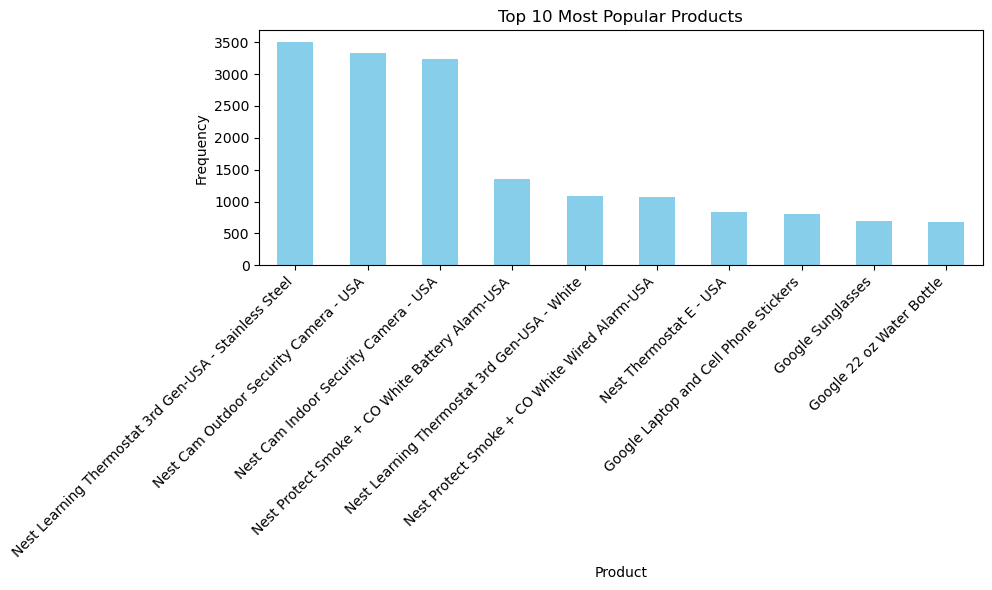

In [488]:
top_products = product_occurrences.head(10)
top_products.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Top 10 Most Popular Products')
plt.xlabel('Product')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [489]:
#encoding
one_hot_encoded = df.groupby(['Transaction_ID', 'Product_Description'])['Product_Description'].count().unstack().fillna(0)


In [491]:
#making the values in the form of binary
binary_encoded = one_hot_encoded.applymap(lambda x: 1 if x > 0 else 0)

In [157]:
pip install mlxtend


     ---------------------------------------- 1.4/1.4 MB 458.4 kB/s eta 0:00:00


In [492]:
#importing the association rule
from mlxtend.frequent_patterns import apriori, association_rules
frequent_itemsets = apriori(binary_encoded, min_support=0.01, use_colnames=True)


C:\Users\Pranav\Downloads\anacondas\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [493]:
#applying the association rule
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
filtered_rules = rules[rules['antecedents'].apply(lambda x: any(item in x for item in top_products)) | 
                       rules['consequents'].apply(lambda x: any(item in x for item in top_products))]

In [494]:
print("Association rules for frequent products:")
print(rules)

Association rules for frequent products:
                                antecedents  \
0   (Nest Cam Indoor Security Camera - USA)   
1  (Nest Cam Outdoor Security Camera - USA)   

                                consequents  antecedent support  \
0  (Nest Cam Outdoor Security Camera - USA)                0.13   
1   (Nest Cam Indoor Security Camera - USA)                0.13   

   consequent support  support  confidence  lift  leverage  conviction  \
0                0.13     0.03        0.21  1.62      0.01        1.10   
1                0.13     0.03        0.21  1.62      0.01        1.10   

   zhangs_metric  
0           0.44  
1           0.44  



  If customers buy Nest Cam Indoor Security Camera - USA,
  They are also likely to buy Nest Cam Outdoor Security Camera - USA.
  This combination is found in 3% of all transactions.
  Confidence level: 21%
  This suggests that 21% of customers who buy Nest Cam Indoor Security Camera - USA also buy Nest Cam Outdoor Security Camera -   USA.


  If customers buy Nest Cam Outdoor Security Camera - USA,
  They are also likely to buy Nest Cam Indoor Security Camera - USA.
  This combination is found in 3% of all transactions.
  Confidence level: 21%
  This suggests that 21% of customers who buy Nest Cam Outdoor Security Camera - USA also buy Nest Cam Indoor Security Camera -   USA.

# 6. Predicting Next Purchase

In [210]:
#Calculating the difference in days between consecutive transactions for each customer.
df['days_btwn_trans'] = df.groupby('CustomerID')['Transaction_Date'].diff().dt.days

In [217]:
#Identifying the repeating customers
new_df = df[df['days_btwn_trans']!=0].dropna()

In [218]:
#Average days between transaction for each transaction
average_days_between_transactions = new_df.groupby('CustomerID')['days_btwn_trans'].mean()

In [219]:
average_days_between_transactions

CustomerID
12347    111.50
12348    119.00
12370    -30.00
12377   -139.00
12383    -14.00
          ...  
18239    150.50
18245    -73.50
18260     27.50
18269    -76.00
18283    -73.00
Name: days_btwn_trans, Length: 734, dtype: float64

In [220]:
#Creating a new dataframe 
customer_df = pd.DataFrame({'CustomerID': average_days_between_transactions.index,
                            'Avg_Days_Between_Transactions': average_days_between_transactions.values})

In [221]:
#Converting negative values to positive
customer_df['Avg_Days_Between_Transactions'] = customer_df['Avg_Days_Between_Transactions'].abs()

In [222]:
customer_df.sort_values(by='Avg_Days_Between_Transactions',ascending=False)

CustomerID  Avg_Days_Between_Transactions
492       16456                         351.00
42        12662                         344.00
260       14466                         332.00
264       14496                         325.00
358       15240                         307.00
..          ...                            ...
525       16735                           1.00
222       14156                           0.60
394       15549                           0.50
446       16016                           0.50
669       17827                           0.33

[734 rows x 2 columns]

In [223]:
#creating a function for depended variable(label)
def month_cat(days):
    if days <= 30:
        return 0
    elif days > 30 and days <= 60:
        return 1
    elif days > 60 and days <= 90:
        return 2
    else:
        return 3

In [224]:
#applying the function
customer_df['Next_Purchase_Group'] = customer_df['Avg_Days_Between_Transactions'].apply(month_cat)

In [225]:
customer_df['Next_Purchase_Group'].value_counts()

0    359
3    151
1    145
2     79
Name: Next_Purchase_Group, dtype: int64

In [226]:
customer_df

CustomerID  Avg_Days_Between_Transactions  Next_Purchase_Group
0         12347                         111.50                    3
1         12348                         119.00                    3
2         12370                          30.00                    0
3         12377                         139.00                    3
4         12383                          14.00                    0
..          ...                            ...                  ...
729       18239                         150.50                    3
730       18245                          73.50                    2
731       18260                          27.50                    0
732       18269                          76.00                    2
733       18283                          73.00                    2

[734 rows x 3 columns]

In [227]:
#making the dataset into features and targets
x = customer_df.drop('Next_Purchase_Group',axis=1)

In [228]:
y = customer_df['Next_Purchase_Group']

In [229]:
#applying train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [230]:
x_train.shape,y_train.shape

((513, 2), (513,))

In [231]:
#applying random forest classifier to x_train and y_train
rf.fit(x_train,y_train)

RandomForestClassifier()

In [232]:
#prediction
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

In [233]:
#prediction score for train set
print(classification_report(y_train,y_train_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       250
           1       1.00      1.00      1.00       101
           2       1.00      1.00      1.00        60
           3       1.00      1.00      1.00       102

    accuracy                           1.00       513
   macro avg       1.00      1.00      1.00       513
weighted avg       1.00      1.00      1.00       513



In [235]:
#prediction score for test set
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      1.00      1.00        44
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        49

    accuracy                           1.00       221
   macro avg       1.00      1.00      1.00       221
weighted avg       1.00      1.00      1.00       221



In [236]:
pd.crosstab(y_test,y_test_pred)

col_0                  0   1   2   3
Next_Purchase_Group                 
0                    109   0   0   0
1                      0  44   0   0
2                      0   0  19   0
3                      0   0   0  49

The model can predict the next purchase day for each customer based on their average days between transactions

# 7. Perform cohort analysis by defining below cohorts 

In [237]:
#Identifying the first transaction of each customer.
first_transaction = df.groupby('CustomerID')['Transaction_Date'].min().reset_index()

In [238]:
df['First_Transaction_Month'] = first_transaction['Transaction_Date'].dt.strftime('%b')

In [464]:
#Identifying the number of customers who are making their first purchase each month
cohort_data = df.groupby('First_Transaction_Month')['CustomerID'].nunique()

In [465]:
cohort_data

First_Transaction_Month
Apr    163
Aug    135
Dec    106
Feb     96
Jan    215
Jul     94
Jun    137
Mar    177
May    112
Nov     68
Oct     87
Sep     78
Name: CustomerID, dtype: int64

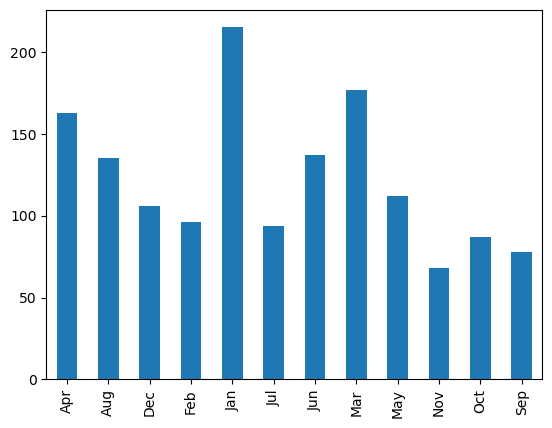

In [466]:
#Bar chart for the number of customers who are making their first purchase each month
charts(cohort_data)

In [504]:
#Analysing the number of unique customers based on the month of their first transaction and the date of subsequent transactions.
cohorts = df.groupby(['First_Transaction_Month', 'Transaction_Date'])['CustomerID'].nunique()
#the retention rates for each cohort over different transaction dates as columns.
retention = cohorts.divide(cohort_data, axis=0).unstack()

In [505]:
cohorts

First_Transaction_Month  Transaction_Date
Apr                      2019-04-01           1
                         2019-04-02           3
                         2019-04-03           5
                         2019-04-04           6
                         2019-04-05          13
                                             ..
Sep                      2019-11-10           1
                         2019-11-11           2
                         2019-11-21           1
                         2019-12-04           1
                         2019-12-19           1
Name: CustomerID, Length: 1237, dtype: int64

In [506]:
#Calculating the average retention rate for each cohort
average_retention = retention.mean(axis=1)

#Finding the cohort with the maximum average retention rate
max_retention_cohort = average_retention.idxmax()

In [508]:
max_retention_cohort

'Dec'

The month 'December' has maximum retention